## Importações:

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.animation as animation
from itertools import combinations
from scipy.optimize import curve_fit
#from scipy.interpolate import interp1d
plt.style.use('seaborn-bright')
import pandas as pd
import math

In [2]:
from funcoes import Particula, mudar_passo, gerar_particulas_dois_sistemas, simular_reacao, exponencial

# Simulando o sistema:

## Parâmetros da simulação:

In [3]:
#Parâmetros da simulação:

numero_particulas = 100
tamanho_caixa = 50
RAIO = 0.5
MASSA = 1
probabilidade_reacao = 0.7
tipo = 'atomo'

tempo_final = 50
numero_passos = 400
tempo_cada_passo = tempo_final/numero_passos

## Simulação da reação química:

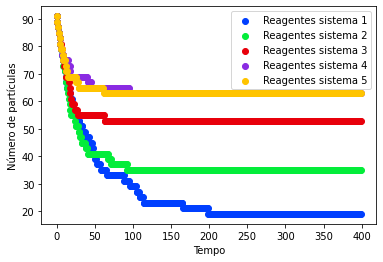

In [4]:
lista_particulas_sistema1, lista_particulas_sistema2, lista_particulas_sistema3, lista_particulas_sistema4, lista_particulas_sistema5 = gerar_particulas_dois_sistemas(numero_particulas, RAIO, MASSA, tamanho_caixa, tipo)

lista_reagentes_sistema1, lista_produtos_sistema1 = [], []
lista_reagentes_sistema2, lista_produtos_sistema2 = [], []
lista_reagentes_sistema3, lista_produtos_sistema3 = [], []
lista_reagentes_sistema4, lista_produtos_sistema4 = [], []
lista_reagentes_sistema5, lista_produtos_sistema5 = [], []

# Compute simulation (It takes some time if numero_passos and numero_particulas are large)
for i in range(numero_passos):
     # Simular colisões
    simular_reacao(lista_particulas_sistema1, probabilidade_reacao)

    # Atualizar posições e velocidades
    mudar_passo(lista_particulas_sistema1, tempo_cada_passo, tamanho_caixa)
    
    a_count, m_count = 0, 0
    
    for particula in lista_particulas_sistema1:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    
    lista_reagentes_sistema1.append(a_count)
    lista_produtos_sistema1.append(m_count)
    
    # Simular colisões para o sistema 2
    simular_reacao(lista_particulas_sistema2, probabilidade_reacao)
    # Atualizar posições e velocidades para o sistema 2
    mudar_passo(lista_particulas_sistema2, tempo_cada_passo, tamanho_caixa)
    
    a_count, m_count = 0, 0
    for particula in lista_particulas_sistema2:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    lista_reagentes_sistema2.append(a_count)
    lista_produtos_sistema2.append(m_count)
    
    
    # Simular colisões para o sistema 3
    simular_reacao(lista_particulas_sistema3, probabilidade_reacao)

    # Atualizar posições e velocidades
    mudar_passo(lista_particulas_sistema3, tempo_cada_passo, tamanho_caixa)
    
    a_count, m_count = 0, 0
    
    for particula in lista_particulas_sistema3:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    
    lista_reagentes_sistema3.append(a_count)
    lista_produtos_sistema3.append(m_count)
    
    simular_reacao(lista_particulas_sistema4, probabilidade_reacao)
    # Atualizar posições e velocidades para o sistema 4
    mudar_passo(lista_particulas_sistema4, tempo_cada_passo, tamanho_caixa)
    
    a_count, m_count = 0, 0
    for particula in lista_particulas_sistema4:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    lista_reagentes_sistema4.append(a_count)
    lista_produtos_sistema4.append(m_count)
    
    # Simular colisões para o sistema 5
    simular_reacao(lista_particulas_sistema5, probabilidade_reacao)

    # Atualizar posições e velocidades
    mudar_passo(lista_particulas_sistema5, tempo_cada_passo, tamanho_caixa)
    
    a_count, m_count = 0, 0
    
    for particula in lista_particulas_sistema5:
        if particula.tipo == 'atomo':
            a_count += 1
        else:
            m_count += 1
    
    lista_reagentes_sistema5.append(a_count)
    lista_produtos_sistema5.append(m_count)
    
    

plt.scatter(list(range(numero_passos)),lista_reagentes_sistema1,label='Reagentes sistema 1')
plt.scatter(list(range(numero_passos)),lista_reagentes_sistema2,label='Reagentes sistema 2')
plt.scatter(list(range(numero_passos)),lista_reagentes_sistema3,label='Reagentes sistema 3')
plt.scatter(list(range(numero_passos)),lista_reagentes_sistema4,label='Reagentes sistema 4')
plt.scatter(list(range(numero_passos)),lista_reagentes_sistema5,label='Reagentes sistema 5')
plt.xlabel('Tempo')
plt.ylabel('Número de partículas')

plt.legend()
plt.savefig('Simulação_reagentes_doissistemas.png')
plt.show()

## Dataframe:

In [5]:
lista = {'Reagentes sistema 1': lista_reagentes_sistema1, 'Reagentes sistema 2': lista_reagentes_sistema2, 'Reagentes sistema 3': lista_reagentes_sistema3, 'Reagentes sistema 4': lista_reagentes_sistema4, 'Reagentes sistema 5': lista_reagentes_sistema5, 'tempo': range(numero_passos)}

print(len(lista_reagentes_sistema1))
print(len(lista_reagentes_sistema1))
print(len(range(numero_passos)))


df = pd.DataFrame(lista)

sistema1_df = df['Reagentes sistema 1'] #df.iloc[0 : 70, 0]
sistema2_df = df['Reagentes sistema 2'] #df.iloc[0 : 70, 0]
sistema3_df = df['Reagentes sistema 1'] #df.iloc[0 : 70, 0]
sistema4_df = df['Reagentes sistema 2'] #df.iloc[0 : 70, 0]
sistema5_df = df['Reagentes sistema 1'] #df.iloc[0 : 70, 0]

temporeacao = df['tempo'] #df.iloc[0:70, 2]

400
400
400


In [6]:
df

,Reagentes sistema 1,Reagentes sistema 2,Reagentes sistema 3,Reagentes sistema 4,Reagentes sistema 5,tempo
0,91,91,91,91,91,0
1,89,89,89,89,89,1
2,87,87,87,87,87,2
3,85,85,85,85,85,3
4,83,83,83,83,83,4
...,...,...,...,...,...,...
395,19,35,53,63,63,395
396,19,35,53,63,63,396
397,19,35,53,63,63,397
398,19,35,53,63,63,398


### Checar se tá certo que o sistema dois tem maior velocidade tem que reagir primeiro, ver se isso está ocorrendo.

## Coeficiente k:

In [ ]:
import lmfit

def fit(x, k, C, D):
    return C*np.exp(-k*x) + D

taxas = []

for sistema_df in [sistema1_df, sistema2_df, sistema3_df, sistema4_df, sistema5_df]:
    
    funcao_fit_model=lmfit.Model(fit)
    funcao_fit_model.set_param_hint('D',value=30, vary=True)
    funcao_fit_model.set_param_hint('C',value=150, vary=True)
    funcao_fit_model.set_param_hint('k',value=.05, vary=True)

    param = funcao_fit_model.make_params()
    results = funcao_fit_model.fit(sistema_df, x = temporeacao, params = param)
    k = results.params['k'].value
    D = results.params['D'].value
    C = results.params['C'].value
    
    x_fit = np.linspace(0, max(temporeacao))
    y_fit = fit(x_fit, k, C, D)
    
    taxas.append(k)
    
    print('k =',k)
    plt.plot(x_fit,y_fit,label='fit')
    plt.plot(temporeacao,sistema_df,label='dados gerados')
    plt.legend()
    plt.show()

In [7]:
# Ajuste para o sistema 1
popt_sistema1, _ = curve_fit(exponencial, temporeacao, sistema1_df)
valores_fit_sistema1 = exponencial(temporeacao, *popt_sistema1)
k1 = popt_sistema1[1]
print("O valor de k para o sistema 1 é:", k1)

# Ajuste para o sistema 2
popt_sistema2, _ = curve_fit(exponencial, temporeacao, sistema2_df)
valores_fit_sistema2 = exponencial(temporeacao, *popt_sistema2)
k2 = popt_sistema2[1]
print("O valor de k para o sistema 2 é:", k2)

# Ajuste para o sistema 3
popt_sistema3, _ = curve_fit(exponencial, temporeacao, sistema3_df)
valores_fit_sistema3 = exponencial(temporeacao, *popt_sistema3)
k3 = popt_sistema3[1]
print("O valor de k para o sistema 2 é:", k2)

# Ajuste para o sistema4
popt_sistema4, _ = curve_fit(exponencial, temporeacao, sistema4_df)
valores_fit_sistema4 = exponencial(temporeacao, *popt_sistema4)
k4 = popt_sistema4[1]
print("O valor de k para o sistema 4 é:", k4)

# Ajuste para o sistema 5
popt_sistema5, _ = curve_fit(exponencial, temporeacao, sistema5_df)
valores_fit_sistema5 = exponencial(temporeacao, *popt_sistema5)
k5 = popt_sistema5[1]
print("O valor de k para o sistema 5 é:", k5)

taxas = [k1, k2, k3, k4, k5]


c:\venv\ilumpy\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


O valor de k para o sistema 1 é: 0.021764930819007103
O valor de k para o sistema 2 é: 0.04711462117024814
O valor de k para o sistema 2 é: 0.04711462117024814
O valor de k para o sistema 4 é: 0.04711462117024814
O valor de k para o sistema 5 é: 0.021764930819007103


# Análise do efeito da Temperatura no sistema:

In [8]:
def calcular_temperatura(lista_particulas, massa):
    """
    Calcula uma estimativa da temperatura do sistema com base na distribuição de Maxwell-Boltzmann das velocidades.

    Args:
        lista_particulas (list): Uma lista de objetos que contêm informações sobre as partículas.
            Cada objeto deve ter um atributo 'velocidade' que represente a velocidade da partícula como um vetor.
        massa (float): A massa das partículas em unidades apropriadas (por exemplo, kg).

    Returns:
        float: A temperatura estimada em Kelvin.

    Note:
        Esta estimativa assume que as velocidades das partículas seguem a distribuição de Maxwell-Boltzmann
        e que o sistema se comporta como um gás ideal.
    """
    v_quadrado_medio = 0
    
    for particula in lista_particulas:
        v_quadrado_medio += np.dot(particula.velocidade, particula.velocidade)
            
    v_quadrado_medio /= len(lista_particulas)
    
    kB = 1.380649e-23  # Constante de Boltzmann em J/K
    temperatura = (massa * v_quadrado_medio) / (3 * kB)
    
    return temperatura

## Simulando sistemas diferentes:
Vamos ter que simular, pegar a lista de valores para calcular a temp e fitar para obter k.
As velocidades dos sistemas são geradas de forma aleatória dentro de `gerar_particulas()`, para gerar esses dois sistemas com velocidades diferentes

#### Massa:
Para o átomo de hidrogênio, que tem uma massa atômica de aproximadamente 1.00784 u (unidades de massa atômica), podemos converter isso para gramas por mol (g/mol) e, em seguida, para quilogramas por mol (kg/mol).

A conversão é feita da seguinte forma:

1. Massa atômica em g/mol:
$M_{\text{H}} = 1.00784 \, \text{u} \times 1 \, \text{g/mol/u} \approx 1.00784 \, \text{g/mol}$

2. Massa atômica em kg/mol:
$m_{\text{H}} = M_{\text{H}} \times 10^{-3} \times N_A \approx 1.00784 \times 10^{-3} \, \text{kg/mol} \times 6.02214076 \times 10^{23} \, \text{mol}^{-1} \approx 1.00784 \times 10^{-26} \, \text{kg/mol}$

Portanto, para o átomo de hidrogênio, a massa molecular é aproximadamente \($1 \times 10^{-26}$\) kg/mol. Se você deseja usar isso na equação de Arrhenius, certifique-se de expressar a energia de ativação (\($E_a$\)) em joules (J) por mol.


### Temperaturas:

In [9]:
# Supondo que a reação seja de H? Massa unitária 
massa_particula = 1*10**(-26)  # Em kg/mol
print(massa_particula)

# Calcular a temperatura
temperatura_sistema1 = calcular_temperatura(lista_particulas_sistema1, massa_particula)
temperatura_sistema2 = calcular_temperatura(lista_particulas_sistema2, massa_particula)
temperatura_sistema3 = calcular_temperatura(lista_particulas_sistema3, massa_particula)
temperatura_sistema4 = calcular_temperatura(lista_particulas_sistema4, massa_particula)
temperatura_sistema5 = calcular_temperatura(lista_particulas_sistema5, massa_particula)


print(f"A temperatura estimada para o sistema 1 é aproximadamente {temperatura_sistema1:.2f} K.")
print(f"A temperatura estimada para o sistema 2 é aproximadamente {temperatura_sistema2:.2f} K.")
print(f"A temperatura estimada para o sistema 3 é aproximadamente {temperatura_sistema3:.2f} K.")
print(f"A temperatura estimada para o sistema 4 é aproximadamente {temperatura_sistema4:.2f} K.")
print(f"A temperatura estimada para o sistema 5 é aproximadamente {temperatura_sistema5:.2f} K.")

temperaturas_arrhenius = [temperatura_sistema1, temperatura_sistema2, temperatura_sistema3, temperatura_sistema4, temperatura_sistema5] #tem que transformar em array?

1e-26
A temperatura estimada para o sistema 1 é aproximadamente 0.04 K.
A temperatura estimada para o sistema 2 é aproximadamente 0.17 K.
A temperatura estimada para o sistema 3 é aproximadamente 0.42 K.
A temperatura estimada para o sistema 4 é aproximadamente 0.68 K.
A temperatura estimada para o sistema 5 é aproximadamente 1.32 K.


## Equação de Arrhenius:

Beleza, então eu tenho que usar as constantes k que saem da minha simulação para colocar na equação de arrhenus e daí obter as informações do meu sistema?

Na verdade, eu simulo aumentando a velocidade (que é a mesma coisa que aumentar a temperatura) e pego esses valores e fito para obter a energia de ativação

In [10]:
def arrhenius_eq(T, A, Ea):
    """
    Calcula a constante de taxa (k) utilizando a Lei de Arrhenius.
    
    Args:
        A (float): Fator de pré-exponencial de Arrhenius.
        Ea (float): Energia de ativação em Joules por mol.
        R (float): Constante dos gases ideais em Joules por mol por Kelvin.
        T (float): Temperatura em Kelvin.
        
    Returns:
        float: Constante de taxa (k).
    """
    R = 8.314  # Constante dos gases ideais em J/(mol K)
    
    return A * np.exp(-Ea / (R * T))

In [11]:
temperaturas_arrhenius = np.array(temperaturas_arrhenius)
ln_taxas = np.log(taxas) #fica melhor com o log
ln_taxas = np.array(ln_taxas)

print(len(ln_taxas))

# Ajuste linear
params, covariance = curve_fit(arrhenius_eq, temperaturas_arrhenius, ln_taxas)
A_fit, Ea_fit = np.exp(params[0]), -params[1]

print(f"Fator de pré-exponencial (A): {A_fit}")
print(f"Energia de ativação (Ea): {Ea_fit} J/mol")


5
Fator de pré-exponencial (A): 0.032470688629715506
Energia de ativação (Ea): 0.027548647057293166 J/mol


## Plot da equação de Arrhenius:

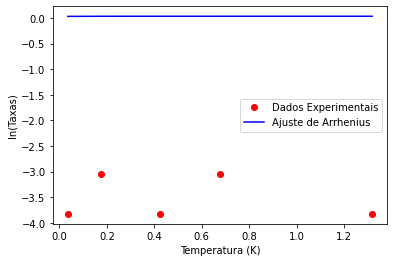

In [12]:
valores_ajustados = arrhenius_eq(temperaturas_arrhenius, A_fit, Ea_fit)

# Plotar os dados experimentais e a curva ajustada
plt.plot(temperaturas_arrhenius, ln_taxas, 'ro', label='Dados Experimentais')
plt.plot(temperaturas_arrhenius, valores_ajustados, 'b-', label='Ajuste de Arrhenius')

#plt.scatter(temperaturas_arrhenius, ln_taxas, color='red', label='Dados simulados')
#plt.plot(temperaturas, valores_ajustados, color='blue', label='Ajuste de Arrhenius')
plt.xlabel('Temperatura (K)')
plt.ylabel('ln(Taxas)')
plt.legend()
plt.show()

Fator de pré-exponencial (A): 17117.316028460427
Energia de ativação (Ea): 27562.73987810396 J/mol


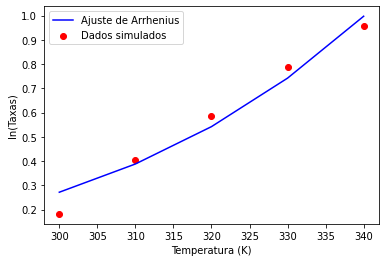

In [13]:

# Defina a função de Arrhenius
def arrhenius_eq(T, A, Ea):
    R = 8.314  # Constante dos gases ideais em J/(mol K)
    return A * np.exp(-Ea / (R * T))

# Dados experimentais (temperatura em Kelvin e taxa de reação)
temperaturas = np.array([300, 310, 320, 330, 340])
taxas = np.array([1.2, 1.5, 1.8, 2.2, 2.6])

# Transformação dos dados
ln_taxas = np.log(taxas)

# Ajuste linear
params, covariance = curve_fit(arrhenius_eq, temperaturas, ln_taxas)
A_fit, Ea_fit = params

# Calcular os valores ajustados
valores_ajustados = arrhenius_eq(temperaturas, A_fit, Ea_fit)

# Imprimir os resultados
print(f"Fator de pré-exponencial (A): {A_fit}")
print(f"Energia de ativação (Ea): {Ea_fit} J/mol")

# Plotar os dados experimentais e a curva ajustada
plt.scatter(temperaturas, ln_taxas, color='red', label='Dados simulados')
plt.plot(temperaturas, valores_ajustados, color='blue', label='Ajuste de Arrhenius')
plt.xlabel('Temperatura (K)')
plt.ylabel('ln(Taxas)')
plt.legend()
plt.show()


# <span style="color:red"> Vamos ter que adicionar mais pontos para plotar o gráfico de arrhenius </span>


# Análise do efeito de catalisadores no sistema:

1. Adicionar uma Classe para Catalisadores:

Atualizar a Função de Simulação:


In [14]:
def simular_reacao(lista_particulas, probabilidade_reacao, probabilidade_desativacao):
    for i, particula in enumerate(lista_particulas):
        if particula.tipo == 'catalisador' and not particula.ativo:
            continue  # Ignora catalisadores desativados

        # Restante da lógica de simulação aqui

        if particula.tipo == 'reagente':
            # ...
            if probabilidade_reacao > random.uniform(0, 1):
                # Reação ocorre
                # ...
                if particula.tipo == 'catalisador':
                    # Verifica se a desativação do catalisador ocorre
                    if probabilidade_desativacao > random.uniform(0, 1):
                        particula.desativar()
                        print(f'Catalisador desativado: {i}')


Adicionar uma Probabilidade de Desativação:

In [15]:
# Dentro do loop de simulação
probabilidade_desativacao = 0.05  # Ajuste conforme necessário
simular_reacao(lista_particulas, probabilidade_reacao, probabilidade_desativacao)


NameError: name 'lista_particulas' is not defined

Utilize Catalisadores na Simulação:

In [ ]:
# Ao gerar as partículas
lista_particulas = gerar_particulas(N, raio, massa, tamanho_caixa, tipo)
lista_catalisadores = gerar_catalisadores(N_catalisadores, raio, massa, tamanho_caixa, tipo)
lista_particulas.extend(lista_catalisadores)


# Análise do efeito estereoquímico no sistema:
A sugestão do Amauri foi variar a probabilidade de reação e ver o impacto disso.

não muda a ordem de reação só a velocidade.)

---

## Análise do Método da Velocidade Inicial:

In [ ]:
# Vlor de K pela quantidade de partículas iniciais
# Initial rate method

In [ ]:
numero_particulas = [20, 60, 100] #, 140, 180, 200]

parametros_ajustados = []
valores_ajustados = []
valores_iniciais = []

for num_particulas in numero_particulas:
    lista_particulas = gerar_particulas(num_particulas, RAIO, MASSA, tamanho_caixa, tipo)
    lista_atomos =  []

    # Compute simulation
    for i in range(numero_passos):
        # Simular colisões
        simular_reacao(lista_particulas, probabilidade_reacao)

        # Atualizar posições e velocidades
        mudar_passo(lista_particulas, tempo_cada_passo, tamanho_caixa)

        a_count, m_count = 0, 0

        for particula in lista_particulas:
            if particula.tipo == 'atomo':
                a_count += 1

        lista_atomos.append(a_count)
       
    temporeagente = range(numero_passos)  
    atomodf = lista_atomos  
    valores_iniciais.append(atomodf)
    
    popt, _ = curve_fit(exponencial, temporeagente, atomodf)
    parametros_ajustados.append(popt)
    valores_fit_reagente = exponencial(temporeagente, *popt)
    valores_ajustados.append(valores_fit_reagente)


for i, popt in enumerate(parametros_ajustados):
    print(f"Para N = {numero_particulas[i]}, os parâmetros ajustados são: k={popt[1]}")


plt.figure(figsize=(10, 5))
for i, num_particulas in enumerate(numero_particulas):
    plt.plot(temporeagente, valores_ajustados[i], label=f'N = {num_particulas}')
    
for dados in valores_iniciais:
    plt.scatter(temporeagente, dados, s=10)

plt.xlabel('Número de partículas')
plt.ylabel('Tempo')
plt.legend()
plt.savefig('concentracaoinicial.png')
plt.show()